In [ ]:
!pip install fastf1

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

In [3]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from google.colab import files

In [5]:
# Setup plotting
plotting.setup_mpl()

In [ ]:
# Load the session data
race = ff1.get_session(2022, 'Abu Dhabi', 'R')

In [7]:
# Collect all race laps
laps = race.load_laps(with_telemetry=True)

/usr/local/lib/python3.8/dist-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"


In [11]:
# Get laps of the drivers (VER and LEC)
laps_ver = laps.pick_driver('VER')
laps_lec = laps.pick_driver('LEC')
# Extract the fastest laps
fastest_ver = laps_ver.pick_fastest()
fastest_lec = laps_lec.pick_fastest()

In [12]:
# Get telemetry from fastest laps
telemetry_ver = fastest_ver.get_car_data().add_distance()
telemetry_lec = fastest_lec.get_car_data().add_distance()

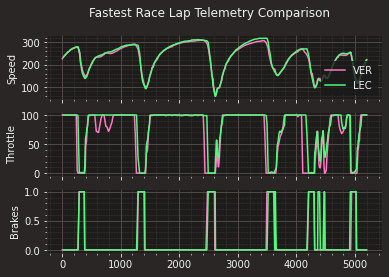

In [17]:
fig, ax = plt.subplots(3)
fig.suptitle("Fastest Race Lap Telemetry Comparison")

ax[0].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER')
ax[0].plot(telemetry_lec['Distance'], telemetry_lec['Speed'], label='LEC')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")
ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label='VER')
ax[1].plot(telemetry_lec['Distance'], telemetry_lec['Throttle'], label='LEC')
ax[1].set(ylabel='Throttle')
ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label='VER')
ax[2].plot(telemetry_lec['Distance'], telemetry_lec['Brake'], label='LEC')
ax[2].set(ylabel='Brakes')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
plt.savefig('LEC_VER.png', dpi=300)

plt.show()

In [18]:
files.download('LEC_VER.png') #Download 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>